# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Redge Santillan

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X , y = load_concrete()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  1030 non-null   float64
 1   slag    1030 non-null   float64
 2   ash     1030 non-null   float64
 3   water   1030 non-null   float64
 4   splast  1030 non-null   float64
 5   coarse  1030 non-null   float64
 6   fine    1030 non-null   float64
 7   age     1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# STEP 3

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

decTreeReg = DecisionTreeRegressor(random_state=0, max_depth=5)      # Decision Trees.ipynb
rfc = RandomForestRegressor(random_state=0, max_depth=5)           # Decision Trees Example.ipynb, Ensembles.ipynb, n_estimators=100, max_features, max_depth, min_samples_leaf
gbrt = GradientBoostingRegressor(random_state=0, max_depth=5)      # Ensembles Example, learning_rate=0.1, n_estimators=100

model = [decTreeReg, rfc, gbrt]
results_dict_1 = {
    "Model": ["DecisionTreeRegressor", "RandomForestRegressor", "GradientBoostingRegressor"],
    "X size": [],
    "y size": [],
    "Neg MSE (Training)" : [],
    "Neg MSE (Testing)" : [],
    "R2 Error (Training)" : [],
    "R2 Error (Testing)" : []
}

for n in range(3):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     random_state=0)
    (model[n]).fit(X_train, y_train)                                        # model fit line
    results_dict_1["X size"].append(X.shape)
    results_dict_1["y size"].append(y.shape)

In [4]:
# STEP 4
from sklearn.model_selection import cross_validate

cv_result = [0] * 3

for n in range(0,3):
    cv_result[n] = cross_validate(model[n], X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
    neg_mse_train = cv_result[n]['train_score'].mean() * (-1)
    neg_mse_test = cv_result[n]['test_score'].mean() * (-1)

    results_dict_1["Neg MSE (Training)"].append(neg_mse_train)
    results_dict_1["Neg MSE (Testing)"].append(neg_mse_test)

# print(cv_result[0])

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [5]:
# TO DO: ADD YOUR CODE HERE
cv_result = [0] * 3

for n in range(0,3):
    cv_result[n] = cross_validate(model[n], X_train, y_train.values.ravel(), scoring='r2', return_train_score=True)
    r2_error_train = cv_result[n]['train_score'].mean()
    r2_error_test = cv_result[n]['test_score'].mean()
    
    results_dict_1["R2 Error (Training)"].append(r2_error_train)
    results_dict_1["R2 Error (Testing)"].append(r2_error_test)


In [6]:
# STEP 5 
results_df_1 = pd.DataFrame(results_dict_1)
results_df_1



,Model,X size,y size,Neg MSE (Training),Neg MSE (Testing),R2 Error (Training),R2 Error (Testing)
0,DecisionTreeRegressor,"(1030, 8)","(1030,)",47.279761,73.447331,0.834465,0.738697
1,RandomForestRegressor,"(1030, 8)","(1030,)",29.576135,45.052441,0.896561,0.840951
2,GradientBoostingRegressor,"(1030, 8)","(1030,)",3.379440,22.819636,0.988171,0.919348


In [7]:
# adding assignment 2 values to compare values
new_row = ["Assignment2 - LinearRegression", "(1030, 8)","(1030,)",111.358439, 95.904136, 0.610823, 0.623414]
results_df_1.loc[len(results_df_1)] = new_row
results_df_1

,Model,X size,y size,Neg MSE (Training),Neg MSE (Testing),R2 Error (Training),R2 Error (Testing)
0,DecisionTreeRegressor,"(1030, 8)","(1030,)",47.279761,73.447331,0.834465,0.738697
1,RandomForestRegressor,"(1030, 8)","(1030,)",29.576135,45.052441,0.896561,0.840951
2,GradientBoostingRegressor,"(1030, 8)","(1030,)",3.379440,22.819636,0.988171,0.919348
3,Assignment2 - LinearRegression,"(1030, 8)","(1030,)",111.358439,95.904136,0.610823,0.623414


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

##### ANSWERS: #####
1. The 3 models used in Part 1 were able to produce better results than the LinearRegression model used in Assignment 2 (as shown above).
1. `GradientBoostingRegressor()` performed better than the rest, as showcased by the model's NegMSE and R2 Error scores. The MSE values were close to the ideal value of 0, meaning that the model was very close to the true values. The R2 Errors were the closest to 1, meaning that it had the best "goodness of fit".
1. One suggestion would be to increase the max_depth of the models. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

#### ANSWERS: ####
1. Example jupyter notebooks, googling, peer discussion.
1. Did all the data imports first. Then the code and number-crunching. Lastly, the questions.
1. Generative AI prompts used:
    - *"Why do a cross-validation score with the training set if we can just get the testing accuracy score with the testing set?"*
1. I had some technical issues with some functions giving me warnings about taking in a column vector. The error message was something like this:
    >```DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().```
    >```y = column_or_1d(y, warn=True)```
    
    For some of them, I was able to make the message go away (I used `y_train.values.ravel()` in my `cross_validate()` function calls).

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

#### Importing the data ####
To execute the data import, install `ucimlrep` via a `pip install ucimlrepo` command. If on Colab, run cell below.

In [ ]:
# !pip install ucimlrepo

In [8]:
# TO DO: Import wine dataset

# From the website:

from ucimlrepo import fetch_ucirepo         # do a pip install ucimlrepo
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physical Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'doi': '

In [9]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(wine))

(178, 13)
(178, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'ucimlrepo.dotdict.dotdict'>


Print the first five rows of the dataset to inspect:

In [10]:
# TO DO: ADD YOUR CODE HERE
print("First 5 rows of X:")
print(X.head(5))
print("First 5 rows of y:")
print(y.head(5))

First 5 rows of X:
   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0     

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [11]:
# TO DO: ADD YOUR CODE HERE
X_nulls = X.isnull().sum().sort_values(ascending=False)
y_nulls = X.isnull().sum().sort_values(ascending=False)
print(X_nulls)
print()
print(y_nulls)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [12]:
# TO DO: ADD YOUR CODE HERE
print(y.value_counts())

class
2        71
1        59
3        48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [13]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# STEP 3: 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

decTreeCla = DecisionTreeClassifier(random_state=0, max_depth=3)
svc = SVC(random_state=0)

model = [decTreeCla, svc]
results_dict_2 = {
    "Model": ["DecisionTreeClassifier", "SVC"],
    "X size": [],
    "y size": [],
    "Accuracy (Training)" : [],
    "Accuracy (Testing)" : []
}

for n in range(2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     random_state=0)
    (model[n]).fit(X_train, y_train)

    results_dict_2["X size"].append(X.shape)
    results_dict_2["y size"].append(y.shape)

/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# STEP 4:

cv_result = [0] * 2

for n in range(0,2):
    cv_result[n] = cross_validate(model[n], X_train, y_train.values.ravel(), scoring='accuracy', return_train_score=True)
    acc_score_test = cv_result[n]['test_score'].mean()
    acc_score_train = cv_result[n]['train_score'].mean()
    # print(neg_mse_test)
    print(acc_score_test)
    results_dict_2["Accuracy (Testing)"].append(acc_score_test)
    results_dict_2["Accuracy (Training)"].append(acc_score_train)

0.8940170940170941
0.6766381766381766


In [15]:
# STEP 5:
results_df_2 = pd.DataFrame(results_dict_2)
results_df_2

,Model,X size,y size,Accuracy (Training),Accuracy (Testing)
0,DecisionTreeClassifier,"(178, 13)","(178, 1)",0.994357,0.894017
1,SVC,"(178, 13)","(178, 1)",0.680427,0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [16]:
# TO DO: Implement best model
# DTC was better
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, decTreeCla.predict(X_test))

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


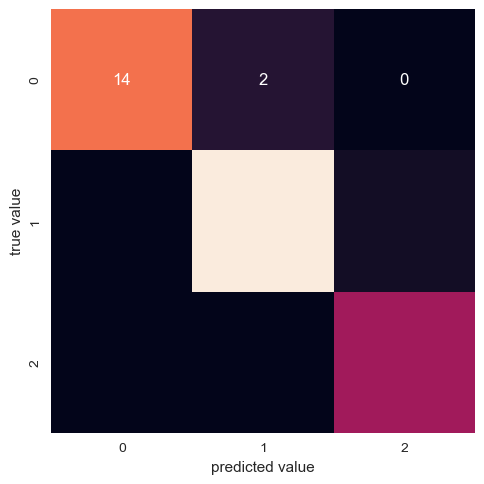

In [17]:
# TO DO: Print confusion matrix using a heatmap

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


# For some reason, the last 6 numbers were not printing on VS code. Please see my 'mat' variable printout.
print(mat)

In [18]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, decTreeCla.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [21]:
# Looking at the effect of varying C hyperparameter on a scaled dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv_result = [0] * 6
counter = 0

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svc = SVC(C=c).fit(X_train_scaled, y_train)
    cv_result[counter] = cross_validate(svc, X_train_scaled, y_train.values.ravel(), scoring='accuracy', return_train_score=True)
    acc_score_train = cv_result[counter]['train_score'].mean()
    acc_score_test = cv_result[counter]['test_score'].mean()
    # print(neg_mse_test)
    print(f"C = {c}")
    print(f"Accuracy (Training) = {acc_score_train}")
    print(f"Accuracy (Testing) = {acc_score_test}")
    results_dict_2["Accuracy (Testing)"].append(acc_score_test)
    results_dict_2["Accuracy (Training)"].append(acc_score_train)
    # print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
    # print("Accuracy on validation set: {:.2f}".format(svc.score(X_val_scaled, y_val)))
    counter += counter

C = 0.001
Accuracy (Training) = 0.37594780461999655
Accuracy (Testing) = 0.37606837606837606
C = 0.01
Accuracy (Training) = 0.37594780461999655
Accuracy (Testing) = 0.37606837606837606
C = 0.1
Accuracy (Training) = 0.9774642920119909
Accuracy (Testing) = 0.9472934472934472
C = 1
Accuracy (Training) = 0.9943572562158348
Accuracy (Testing) = 0.9774928774928775
C = 10
Accuracy (Training) = 1.0
Accuracy (Testing) = 0.9549857549857549
C = 100
Accuracy (Training) = 1.0
Accuracy (Testing) = 0.9549857549857549


/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vecto

### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

#### ANSWERS: ####
1. The training and validation accuracy were vastly different. `DecisionTreeClassifier()` had training and validation accuracy scores of `0.994357`, and `0.894017`, respectively. This meant that the model was very close to perfectly fitting the training data, and did an excellent job at predicting with the testing data. On the other hand `SVC()` only achieved `0.680427` and `0.676638` in the same respective scores.

    Model                   | Accuracy (Training)| Accuracy (Testing)
    ------------------------|--------------------|-------------------
    DecisionTreeClassifier  | **0.994357**	     |**0.894017** 
    SVC                     | 0.680427           |0.676638

1. Support vector machines model did not work as well as the tree-based model.
    - First reason as to why  is that we did not change the values of `C` and `gamma` in the `SVC()` model. These two hyperparameters control the complexity of the model. Another reason could be that we did not scale the training data prior to fitting with `SVC()`.
1. A total of 3 values were incorrectly predicted in Step 5.2
1. Since improving recall will reduce precision, and vice versa. And with the numbers being very close, improving either one will result in decreasing the other. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

#### ANSWERS: ####
1. Example jupyter notebooks, googling, peer discussion.
1. Did all the data imports first. Then the code and number-crunching. Lastly, the questions.
1. Generative AI prompts used:
    - *"When evaluating an ML model's performance using MSE and R2 scores, what are the ideal values to strive for. Explain why each ideal situation is better."* and *"How are each of them related to bias and variance"*
1. For some reason, some of the numbers in the `sns.heatmap()` visualization doesn't show all the numbers in the confusion matrix. I printed the `mat` variable to confirm that I did indeed get resuts for those missing values.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


#### ANSWER: ####

Some models just work better right from the get-go, without even modifying hyperparameters (shown in the above table). The way that these two models predict the target variables are different, and hence your usage of either one really depends on your data, and what results you get (an iterative tweaking process)

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


#### ANSWER: ####
- I liked seeing the visual of the confusion matrix - very effective at demonstrating the classification results from the training.
- I was confused about which dataset to use for `cross_validate()` but was later clarified by the prof.
- It was very interesting to see how the scalers and hyperparameter-tweaking made the `SVC()` model a lot better.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [ ]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

results_dict_3 = {
    "Model": ["LinearSVC"],
    "X size": [],
    "y size": [],
    "Accuracy (Training)" : [],
    "Accuracy (Testing)" : []
}

linear_svm_model = LinearSVC(max_iter=5000, random_state=0)
linear_svm_model.fit(X_train, y_train)
cv_result_LSVM = cross_validate(linear_svm_model, X_train, y_train.values.ravel(), scoring='accuracy', return_train_score=True)

results_dict_3["X size"].append(X.shape)
results_dict_3["y size"].append(y.shape)

LSVM_score_test = cv_result_LSVM['test_score'].mean()
LSVM_score_train = cv_result_LSVM['train_score'].mean()
# print(acc_score_test)
results_dict_3["Accuracy (Testing)"].append(LSVM_score_test)
results_dict_3["Accuracy (Training)"].append(LSVM_score_train)

/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/redge/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: Conver

#### ANSWER: ####

`LinearSVC(max_iter=5000)` gives good results based on the training and testing accuracy scores, but is not as effective as the `DecisionTreeClassifier(max_depth=3)` model. 

In [ ]:
results_df_3 = pd.DataFrame(results_dict_3)
results_df_3

,Model,X size,y size,Accuracy (Training),Accuracy (Testing)
0,LinearSVC,"(178, 13)","(178, 1)",0.868295,0.849858
